In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import time

class Graph:
    def __init__(self, num_vertices):
        self.adj_matrix = np.zeros((num_vertices, num_vertices))

    def add_edge(self, i, j, distance):
        self.adj_matrix[i][j] = distance
        self.adj_matrix[j][i] = distance

def ant_colony_algorithm(cities, alpha=1, beta=5, rho=0.5, Q=100, n_ants=10, n_iterations=100):
    n_cities = len(cities)
    distances = cdist(cities, cities)
    pheromones = np.ones((n_cities, n_cities))
    best_solution = None
    best_distance = float('inf')
    ant_paths = []  # keep track of paths taken by ants in each iteration
    for iteration in range(n_iterations):
        solutions = []
        distances_of_solutions = []
        paths = []  # store paths taken by ants in this iteration
        for ant in range(n_ants):
            visited_cities = [0]
            unvisited_cities = list(range(1, n_cities))
            distance_travelled = 0
            while unvisited_cities:
                current_city = visited_cities[-1]
                unvisited_distances = distances[current_city, unvisited_cities]
                probabilities = pheromones[current_city, unvisited_cities]**alpha * (1/unvisited_distances)**beta    #### probability of phormones
                probabilities = probabilities/probabilities.sum()
                next_city = np.random.choice(unvisited_cities, p=probabilities)       ##### about amount pheromones chose next path
                visited_cities.append(next_city)
                unvisited_cities.remove(next_city)      
                distance_travelled += distances[current_city, next_city]
            distance_travelled += distances[visited_cities[-1], 0]
            solutions.append(visited_cities)                          ##### cost function
            distances_of_solutions.append(distance_travelled)
            paths.append(visited_cities)  # store path taken by this ant
            if distance_travelled < best_distance:
                best_solution = visited_cities
                best_distance = distance_travelled
        pheromones *= (1-rho)        ###rho, which is a value between 0 and 1  A higher value of rho means that the pheromone trail evaporates faster.
        for i, solution in enumerate(solutions):
            for j in range(n_cities):
                pheromones[solution[j], solution[(j+1)%n_cities]] += Q/distances_of_solutions[i]     ###update the pheromone trail on the edge
        ant_paths.append(paths)  # store all paths taken by ants in this iteration
    return best_solution, best_distance, ant_paths

cities_df = pd.read_excel('/content/15-Points.xlsx')
cities = cities_df[['x', 'y']].to_numpy()

# Benchmarking the algorithm
start_time = time.time()
best_solution, best_distance, ant_paths = ant_colony_algorithm(cities)
end_time = time.time()
execution_time = end_time - start_time

print('Best solution:', best_solution)
print('Best distance:', best_distance)
print('Execution time:', execution_time, 'seconds')


Best solution: [0, 12, 1, 14, 8, 4, 6, 2, 11, 13, 9, 7, 5, 3, 10]
Best distance: 284.3810904080332
Execution time: 0.7558426856994629 seconds


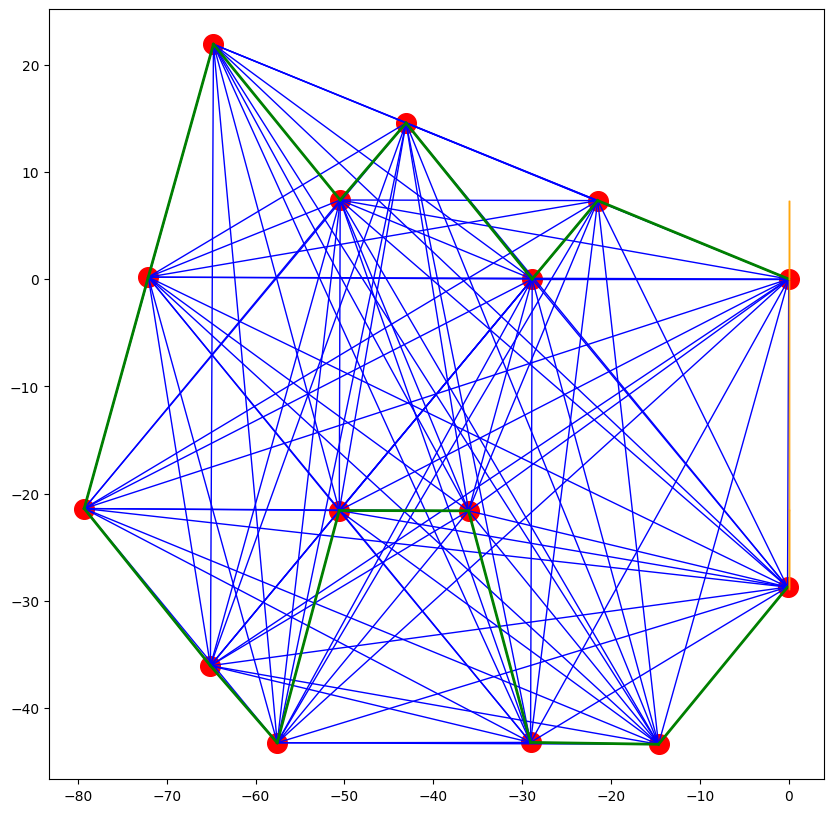

In [ ]:

# plot graph and paths

graph = Graph(num_vertices=len(cities))
for i in range(len(cities)):
    for j in range(i+1, len(cities)):
        distance = int(round(np.linalg.norm(cities[i] - cities[j])))
        graph.add_edge(i, j, distance)

fig, ax = plt.subplots(figsize=(10, 10))
for i in range(len(cities)):
    ax.scatter(cities[i][0], cities[i][1], s=200, color='red')
for i in range(len(cities)):
    for j in range(i+1, len(cities)):
        if graph.adj_matrix[i][j] > 0:
            ax.plot([cities[i][0], cities[j][0]], [cities[i][1], cities[j][1]], linewidth=1, color='blue')
for i in range(len(best_solution)-1):
    ax.plot([cities[best_solution[i]][0], cities[best_solution[i+1]][0]], [cities[best_solution[i]][1], cities[best_solution[i+1]][1]], linewidth=2, color='green')
for path in ant_paths:
    for i in range(len(path)-1):
        ax.plot([cities[path[i]][0], cities[path[i+1]][0]], [cities[path[i]][1], cities[path[i+1]][1]], linewidth=1, color='orange', alpha=0.2)


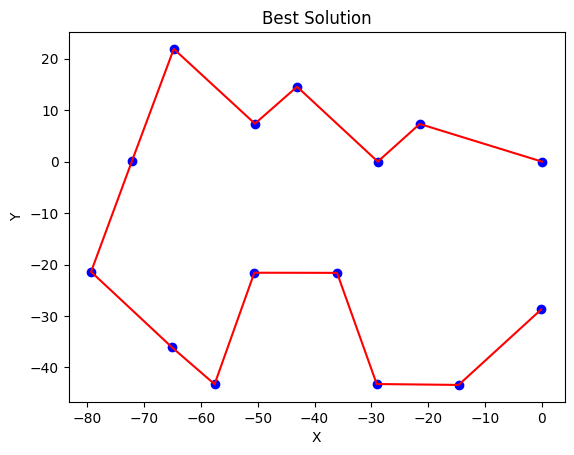

In [ ]:
# Plot cities
plt.scatter(cities[:,0], cities[:,1], color='blue')

# Plot best solution
best_solution_x = cities[best_solution][:,0]
best_solution_y = cities[best_solution][:,1]
plt.plot(best_solution_x, best_solution_y, color='red')

# Set plot title and labels
plt.title('Best Solution')
plt.xlabel('X')
plt.ylabel('Y')

# Show plot
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import time

#Sphera function formula

def sphere(x):
    return np.sum(x**2)

#read data from file
def read_data(filename):
    data = pd.read_excel(filename)
    return data.to_numpy()

#class to the edges of the graph
class Graph:
    def __init__(self, num_vertices):
        self.adj_matrix = np.zeros((num_vertices, num_vertices))

    def add_edge(self, i, j, distance):
        self.adj_matrix[i][j] = distance
        self.adj_matrix[j][i] = distance

#ant colony function the #ants, # iterations, the pheromone evaporation rate, the strength of the pheromone bias, #of itration 
def ant_colony_algorithm(cities, alpha=1, beta=5, rho=0.5, Q=100, n_ants=10, n_iterations=100):
    n_cities = len(cities)  #the# cities
    distances = cdist(cities, cities) #echludian dostance

    pheromones = np.ones((n_cities, n_cities)) #matrix 1*1
    best_solution = None
    best_distance = float('inf')
    ant_paths = []  # keep track of paths taken by ants in each iteration
    for iteration in range(n_iterations):
        solutions = []
        distances_of_solutions = []
        paths = []  # store paths taken by ants in this iteration
        for ant in range(n_ants):
            visited_cities = [0]   #start from the first city
            unvisited_cities = list(range(1, n_cities))  
            distance_travelled = 0
            while unvisited_cities:
                current_city = visited_cities[-1] 
                unvisited_distances = distances[current_city, unvisited_cities]   #determine the unvisited city
                probabilities = pheromones[current_city, unvisited_cities]**alpha * (1/unvisited_distances)**beta   #probabilities of the phermones
                probabilities = probabilities/probabilities.sum()

                next_city = np.random.choice(unvisited_cities, p=probabilities) 
                visited_cities.append(next_city)
                unvisited_cities.remove(next_city)
                distance_travelled += distances[current_city, next_city]

            # Apply Sphere function to last city in ant's tour
            #########sphera function test#################
            last_city = visited_cities[-1]
            distance_travelled += sphere(cities[last_city])

            solutions.append(visited_cities)
            distances_of_solutions.append(distance_travelled)
            paths.append(visited_cities)  # store path taken by this ant
            if distance_travelled < best_distance:
                best_solution = visited_cities
                best_distance = distance_travelled
        pheromones *= (1-rho)
        for i, solution in enumerate(solutions):
            for j in range(n_cities):
                pheromones[solution[j], solution[(j+1)%n_cities]] += Q/distances_of_solutions[i]
        ant_paths.append(paths)  # store all paths taken by ants in this iteration

    # Evaluate the best solution using the Sphere function
    best_solution_coords = cities[best_solution]
    best_fitness = sphere(best_solution_coords)

    return best_solution, best_fitness, ant_paths


filename = '/content/15-Points.xlsx'
cities_df = pd.read_excel(filename)
cities = cities_df[['x', 'y']].to_numpy()
start_time = time.time()
best_solution, best_fitness, ant_paths = ant_colony_algorithm(cities)
end_time = time.time()
execution_time = end_time - start_time

print('Best solution:', best_solution)
print('Best distance:', best_fitness)
print('Execution time:', execution_time, 'seconds')


Best solution: [0, 12, 1, 14, 8, 4, 6, 2, 11, 13, 9, 7, 5, 3, 10]
Best distance: 43778.60444986762
Execution time: 2.4110281467437744 seconds


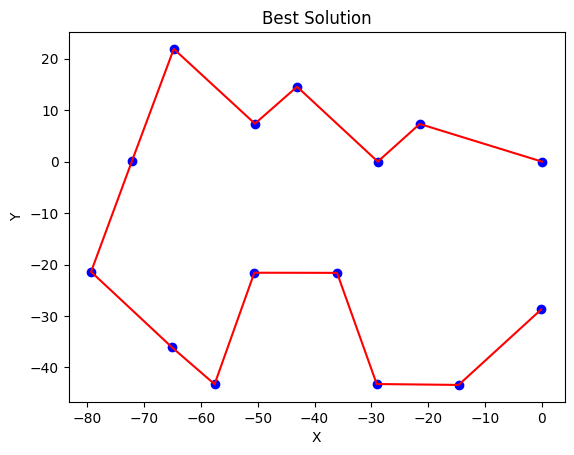

In [ ]:
# Plot cities
plt.scatter(cities[:,0], cities[:,1], color='blue')

# Plot best solution
best_solution_x = cities[best_solution][:,0]
best_solution_y = cities[best_solution][:,1]
plt.plot(best_solution_x, best_solution_y, color='red')

# Set plot title and labels
plt.title('Best Solution')
plt.xlabel('X')
plt.ylabel('Y')

# Show plot
plt.show()
